In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dig = load_digits()

file = pd.DataFrame(dig.data, columns = dig.feature_names)
file['target'] = dig.target

In [3]:
file.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = file.drop('target', axis = 1)
y = file['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
get_best = GridSearchCV(
    KNeighborsClassifier(), 
    {
        'n_neighbors' : [3, 5, 10], 
        'weights' : ['uniform', 'distance'], 
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    return_train_score=False, 
    cv = 5
)
get_best.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [9]:
get_best.best_params_, get_best.best_score_

({'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'},
 0.966621788919839)

In [11]:
model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'uniform')

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
model.score(X_test, y_test)

0.9722222222222222

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 36]], dtype=int64)

<Axes: >

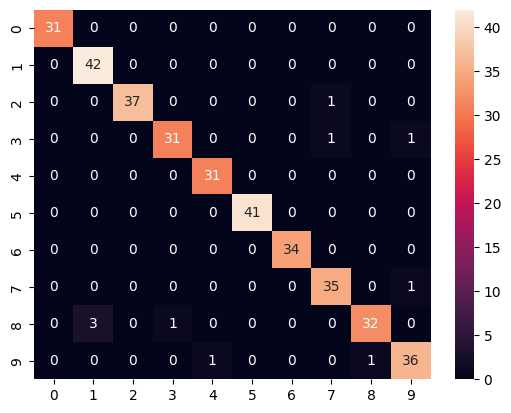

In [15]:
import seaborn as sns

sns.heatmap(cm, annot= True)